In [17]:
import helper_functions
import sandia_stats
import time
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import phasing_functions
from math import floor
%matplotlib inline

In [18]:
# Generate individual plots for a person for a specific chromsome
chr_num = 7


In [22]:
# Step 0: Read config file
with open('phasing_config_file.txt', 'r') as f:
    config_elem = {}
    for line in f:
        line_split = line.strip().split('\t')
        #print(line_split)
        config_elem[line_split[0]] = line_split[1]


In [4]:
# Step 1: Obtain names from ped file
names = helper_functions.ped_file_reader(config_elem["PED_FILE"])

In [5]:
# Step 2: Read in the vcf file
df = helper_functions.read_VCF(config_elem["VCF_FILE"], names)

C:\Users\rodriguezah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [6]:
# Step 3: obtain only SNPs
SNP_df = helper_functions.SNP_filter(df)

In [7]:
snp_chr_dict = dict(tuple(SNP_df.groupby(["#CHROM"])))

In [ ]:
#print(snp_chr_dict[7])

In [ ]:
# Step 5: Do phasing
vcf_pos, maternal_rd, paternal_rd = phasing_functions.phasable_snp_determiner(snp_chr_dict[chr_num], config_elem["PROBAND_NAME"], names[0], names[1])

In [ ]:
# Generate difference array
diff_arr = maternal_rd - paternal_rd

In [ ]:
plt.plot(diff_arr)
plt.xlabel("Number of Phasable SNPs")
plt.ylabel("Diff between Mat and Pat RD")
plt.title("Read Depth Difference in Phasable SNPS of " + config_elem["PROBAND_NAME"] + " on Chr " + str(chr_num))

In [ ]:
outcome_chr_7 = phasing_functions.runner(config_elem["PROBAND_NAME"], names[0], names[1],
                                                  int(config_elem["SAMPLE_SIZE"]), float(config_elem["T_THRES"]),
                                                  snp_chr_dict[chr_num], float(config_elem["EDGE_DETECTION_WIDTH"]))

In [ ]:
print(outcome_chr_7)

In [ ]:
step_function = np.zeros(800)
step_function[400:] = -1 * outcome_chr_7[4]
plt.plot(diff_arr[outcome_chr_7[2]-400:outcome_chr_7[2] + 400])
plt.plot(step_function, color='r')
plt.xlabel("Number of Phasable SNPs")
plt.ylabel("Diff between Mat and Pat RD")
plt.title("Read Depth Difference centered on detected left edge of mosaicism")

In [23]:
t_vals_chr_7 = phasing_functions.t_test_runner(config_elem["PROBAND_NAME"], names[0], names[1],int(config_elem["SAMPLE_SIZE"]), snp_chr_dict[chr_num])

(0.0, 160.0)

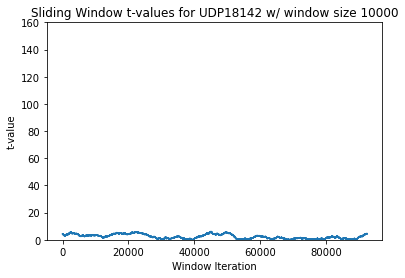

In [24]:
plt.plot(t_vals_chr_7)
plt.xlabel("Window Iteration")
plt.ylabel("t-value")
plt.title("Sliding Window t-values for "+config_elem["PROBAND_NAME"]+ " w/ window size " + config_elem["SAMPLE_SIZE"])
plt.ylim(0,160)